# Finance Dashboard 

## 0. Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st

In [2]:
import FinanceDataReader as fdr
import quantstats as qs

In [3]:
## custom libs

from korquanttools.pricevolume.loader import KRXPriceDM
from korquanttools.pricevolume.utils import DateUtil
from korquanttools.pricevolume.config import PathConfig

In [4]:
import json
import pickle

In [5]:
from tqdm import tqdm

## 1. Import data

- Import price-volume data from KRX using custom lib `korquanttools.pricevolume`

In [6]:
# Global parameters

START = 20140101
# START = 20210101
END = 20220520

In [7]:
pricevolume = KRXPriceDM(START, END)

In [8]:
pricevolume.get_info()


        * DM name: KRX_pricevolume
        * DM description: Basic price-volume data imported from KRX website & NAVER finance. Has KOSPI, KOSDAQ, KONEX stocks.
        * birthday: 20211203
        * DM period: 19990101 ~ 
        * Available data: ['lv1', 'open', 'high', 'low', 'close', 'volume', 'dollarvolume', 'marketcap']
        


In [9]:
# Download price-volume data from KRX.
# Also, build cache for faster access. (Both lv1 and lv2)

close_df = pricevolume.get_data("close")

In [10]:
close_df

ISU_SRT_CD,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,37550L,388050,389140,405640,412930,413600,415580,419270,389260,399720
trdDd,,,,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,4440,438,111500,15500,73500,32600,21750,16850,182500,93300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,4540,440,114000,15400,71800,33400,21450,16850,180500,93000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,11850,791,15550,37350,81700,62900,35850,21000,57800,56800,...,40200,17250,25200,2185,2195,2460,2160,2205,13950,NaN
2022-05-17,11900,788,15450,38250,81800,62900,36950,21200,57800,56700,...,40200,17450,25400,2185,2205,2535,2155,2215,14350,NaN
2022-05-18,12000,783,15200,39750,81200,63000,36800,21150,58600,57100,...,39650,17650,25450,2190,2200,2540,2160,2210,13700,NaN


In [11]:
close_df.loc[:, '005930'] # 삼성전자. 
# 분할했었기 때문에 가격이 100만원 대에서 6만원 대로 변한다. 

trdDd
2014-01-01        NaN
2014-01-02    1309000
2014-01-03    1296000
2014-01-04        NaN
2014-01-05        NaN
               ...   
2022-05-16      66300
2022-05-17      67600
2022-05-18      68100
2022-05-19      67500
2022-05-20      68000
Name: 005930, Length: 3062, dtype: object

In [12]:
volume_df = pricevolume.get_data('volume')
volume_df = volume_df.astype(float)

dollarvolume_df = pricevolume.get_data('dollarvolume')
dollarvolume_df = dollarvolume_df.astype(float)

marketcap_df = pricevolume.get_data('marketcap') # TODO: 현재 object로 불러와져 직접 astype(float) 해줘야 함. fix it. 
marketcap_df = marketcap_df.astype(float)

In [13]:
volume_df

ISU_SRT_CD,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,37550L,388050,389140,405640,412930,413600,415580,419270,389260,399720
trdDd,,,,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,99452.0,68243.0,335.0,115508.0,12328.0,63.0,276618.0,2400.0,21453.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,107190.0,65432.0,853.0,128224.0,12650.0,60.0,253501.0,255.0,21211.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,76716.0,132729.0,62916.0,237055.0,9259.0,85.0,269050.0,1011.0,118147.0,255.0,...,2428.0,69811.0,338419.0,36188.0,46794.0,107402.0,68433.0,25522.0,4096958.0,NaN
2022-05-17,69867.0,143751.0,4967.0,263953.0,9363.0,122.0,336620.0,1305.0,120933.0,289.0,...,2929.0,78778.0,133388.0,5079.0,33892.0,115312.0,12787.0,14057.0,1304034.0,NaN
2022-05-18,207503.0,109346.0,28341.0,305594.0,11524.0,40.0,266185.0,998.0,170379.0,554.0,...,8399.0,119741.0,180316.0,11873.0,34581.0,101786.0,18582.0,9863.0,958821.0,NaN


In [14]:
volume_df.loc[:, '005930'] # 삼성전자
# volume 역시 unadjusted volume이다. 

trdDd
2014-01-01           NaN
2014-01-02      620500.0
2014-01-03      529932.0
2014-01-04           NaN
2014-01-05           NaN
                 ...    
2022-05-16    11937555.0
2022-05-17    15680447.0
2022-05-18    16486319.0
2022-05-19    17073727.0
2022-05-20    12109671.0
Name: 005930, Length: 3062, dtype: float64

## 2. Create additional DMs


- KOSPI, KOSDAQ

In [15]:
lv1_df = pricevolume.get_data('lv1')

In [16]:
market_cat_df = lv1_df[['ISU_SRT_CD', 'MKT_NM', 'trdDd']].copy()

In [17]:
market_cat_df['MKT_NM'].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [18]:
market_cat_df.loc[:, 'is_KOSPI'] = (market_cat_df['MKT_NM'] == 'KOSPI')
market_cat_df.loc[:, 'is_KOSDAQ'] = (market_cat_df['MKT_NM'] == 'KOSDAQ')
market_cat_df.loc[:, 'is_KONEX'] = (market_cat_df['MKT_NM'] == 'KONEX')

In [19]:
kospi_univ_df = pd.pivot(market_cat_df, index='trdDd', columns='ISU_SRT_CD', values='is_KOSPI')
kosdaq_univ_df = pd.pivot(market_cat_df, index='trdDd', columns='ISU_SRT_CD', values='is_KOSDAQ')
konex_univ_df = pd.pivot(market_cat_df, index='trdDd', columns='ISU_SRT_CD', values='is_KONEX')

In [20]:
kosdaq_univ_df.loc[:, '221610'] # 자안바이오 상폐일: 2022-01-05	

trdDd
2014-01-02    NaN
2014-01-03    NaN
2014-01-04    NaN
2014-01-05    NaN
2014-01-06    NaN
             ... 
2022-05-15    NaN
2022-05-16    NaN
2022-05-17    NaN
2022-05-18    NaN
2022-05-19    NaN
Name: 221610, Length: 3060, dtype: object


- tradingday DM by processing `pricevolume`


In [21]:
holidays = close_df.isnull().all(axis=1)
tradingdays = ~holidays

holidays = holidays.index[holidays]
tradingdays = tradingdays.index[tradingdays]

tradingdays

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='trdDd', length=2062, freq=None)


- return & adj.open/high/low/close/volume DM by mixing `pricevolume` and `FinanceDataReader`


In [22]:
universe_df = close_df.notnull()
universe_df

ISU_SRT_CD,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,37550L,388050,389140,405640,412930,413600,415580,419270,389260,399720
trdDd,,,,,,,,,,,,,,,,,,,,,
2014-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-01-02,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2014-01-03,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2014-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2022-05-17,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2022-05-18,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


In [23]:
# # Takes about 20 mins

# adjOpen_df = close_df.copy()
# adjHigh_df = close_df.copy()
# adjLow_df = close_df.copy()
# adjClose_df = close_df.copy()
# adjVolume_df = close_df.copy()
# return_df = close_df.copy()

# for ii in tqdm(close_df.columns):
#     ii_df = fdr.DataReader(ii, DateUtil.numdate2stddate(START), DateUtil.numdate2stddate(END))

#     adjOpen_df.loc[:, ii] = ii_df['Open']
#     adjHigh_df.loc[:, ii] = ii_df['High']
#     adjLow_df.loc[:, ii] = ii_df['Low']
#     adjClose_df.loc[:, ii] = ii_df['Close']
#     adjVolume_df.loc[:, ii] = ii_df['Volume']
#     return_df.loc[:, ii] = ii_df['Change']
    

In [24]:
# adjOpen_df.to_pickle(PathConfig.cache_path / f"temp_adjOpen_{START}_{END}")
# adjHigh_df.to_pickle(PathConfig.cache_path / f"temp_adjHigh_{START}_{END}")
# adjLow_df.to_pickle(PathConfig.cache_path / f"temp_adjLow_{START}_{END}")
# adjClose_df.to_pickle(PathConfig.cache_path / f"temp_adjClose_{START}_{END}")
# adjVolume_df.to_pickle(PathConfig.cache_path / f"temp_adjVolume_{START}_{END}")
# return_df.to_pickle(PathConfig.cache_path / f"temp_return_{START}_{END}")

In [25]:
PathConfig.cache_path

WindowsPath('E:/VSCodeProjects/korquanttools/korquanttools/pricevolume/cache')

In [26]:
adjOpen_df = pd.read_pickle(PathConfig.cache_path / f"temp_adjOpen_{START}_{END}")
adjHigh_df = pd.read_pickle(PathConfig.cache_path / f"temp_adjHigh_{START}_{END}")
adjLow_df = pd.read_pickle(PathConfig.cache_path / f"temp_adjLow_{START}_{END}")
adjClose_df = pd.read_pickle(PathConfig.cache_path / f"temp_adjClose_{START}_{END}")
adjVolume_df = pd.read_pickle(PathConfig.cache_path / f"temp_adjVolume_{START}_{END}")
return_df = pd.read_pickle(PathConfig.cache_path / f"temp_return_{START}_{END}")


### (Skip for now) Download additional data for new DMs 

- KRX sector DM downloaded from KRX
    - NOT PIT(Point-In-Time)
- Corporate finance fundamental analysis data from DART (using 3rd party libraries)
    - Later on, when I need it

In [27]:
kospi_index_df = fdr.DataReader('KS11', DateUtil.numdate2stddate(START), DateUtil.numdate2stddate(END))

In [28]:
kospi_index_df

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,1967.19,2013.11,2013.89,1967.19,207770000.0,-0.0220
2014-01-03,1946.14,1963.72,1964.63,1936.15,188530000.0,-0.0107
2014-01-06,1953.28,1947.62,1961.85,1943.74,193630000.0,0.0037
2014-01-07,1959.44,1947.65,1965.74,1947.08,193030000.0,0.0032
2014-01-08,1958.96,1965.50,1966.95,1950.02,217070000.0,-0.0002
...,...,...,...,...,...,...
2022-05-16,2596.58,2624.69,2629.20,2593.61,780200000.0,-0.0029
2022-05-17,2620.44,2603.58,2621.84,2603.58,873520000.0,0.0092
2022-05-18,2625.98,2634.75,2644.13,2618.00,870270000.0,0.0021


## 3. Make price-volume chart graph

- Simple price-volume chart using both `seaborn`/`streamlit`
- Show biggest winners/losers on mouse hover
    - Make pseudo-KOSPI portfolio mimicking KOSPI index
    - Show Top 3 winners/losers on the graph 

In [29]:
### Make KOSPI index from scratch

In [30]:
kospi_firstday_value = kospi_index_df['Close'].iloc[0]
kospi_firstday_value

1967.19

<AxesSubplot:xlabel='Date'>

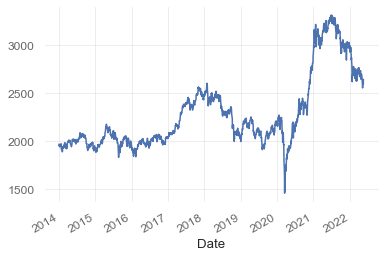

In [31]:
kospi_index_df['Close'].plot() # 목표 plot. 개별 종목 시총 데이터로 이렇게 만들어야 한다. 

In [32]:
kospi_adjClose_df = adjClose_df[kospi_univ_df]
kospi_marketcap_df = marketcap_df[kospi_univ_df]

In [33]:
kospi_adjClose_df = kospi_adjClose_df.loc[tradingdays, :]
kospi_marketcap_df = kospi_marketcap_df.loc[tradingdays, :]

In [34]:
kospi_marketcap_df = kospi_marketcap_df.astype(float)

In [35]:
kospi_marketcap_df


ISU_SRT_CD,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,37550L,388050,389140,405640,412930,413600,415580,419270,389260,399720
trdDd,,,,,,,,,,,,,,,,,,,,,
2014-01-02,1.240157e+11,5.227152e+10,2.778912e+11,1.570596e+12,6.005292e+11,9.912291e+09,1.525406e+12,1.904283e+10,2.035340e+12,2.203634e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,1.268089e+11,5.251021e+10,2.841220e+11,1.560464e+12,5.866394e+11,1.015554e+10,1.504366e+12,1.904283e+10,2.013035e+12,2.196548e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,1.272278e+11,5.251021e+10,2.903527e+11,1.555397e+12,5.939928e+11,1.015554e+10,1.521899e+12,1.853426e+10,2.096679e+12,2.201272e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,1.279261e+11,5.239087e+10,2.903527e+11,1.560464e+12,6.037974e+11,1.010993e+10,1.521899e+12,1.870378e+10,2.197052e+12,2.236700e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,1.321159e+11,5.298757e+10,2.841220e+11,1.560464e+12,6.013462e+11,9.881885e+09,1.511379e+12,1.853426e+10,2.230509e+12,2.231977e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,3.309879e+11,7.604487e+10,4.263074e+11,4.505344e+12,6.997009e+11,1.912525e+10,2.514290e+12,2.373290e+10,4.232779e+12,6.707739e+10,...,8.490043e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-17,3.323845e+11,7.575645e+10,4.235659e+11,4.613906e+12,7.005574e+11,1.912525e+10,2.591437e+12,2.395893e+10,4.232779e+12,6.695930e+10,...,8.490043e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-18,3.351776e+11,7.527577e+10,4.167121e+11,4.794844e+12,6.954188e+11,1.915565e+10,2.580917e+12,2.390242e+10,4.291364e+12,6.743167e+10,...,8.373886e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
kospi_calculated = kospi_marketcap_df.sum(axis=1)
normalize_coef = kospi_firstday_value / kospi_calculated.iloc[0]
kospi_calculated = kospi_calculated * normalize_coef
kospi_calculated

trdDd
2014-01-02    1967.190000
2014-01-03    1945.638220
2014-01-06    1953.500875
2014-01-07    1959.143372
2014-01-08    1959.462409
                 ...     
2022-05-16    3465.845534
2022-05-17    3498.326030
2022-05-18    3506.628419
2022-05-19    3462.195259
2022-05-20       0.000000
Length: 2062, dtype: float64

<AxesSubplot:xlabel='trdDd'>

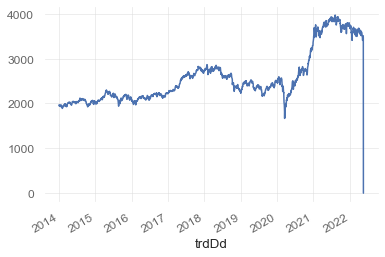

In [37]:
kospi_calculated.plot()

<AxesSubplot:xlabel='Date'>

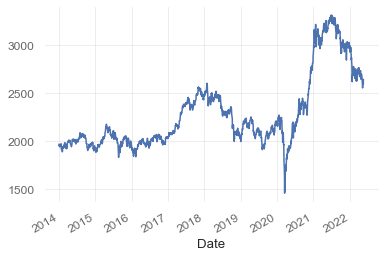

In [38]:
kospi_index_df['Close'].plot()

KOSPI 지수와 직접 계산한 시가총액 기준 지수가 너무 다른 것을 알 수 있다. 

이는 신규종목상장과 상장폐지종목을 고려하지 않았기 때문이다. 

단순 시가총액 합산방식을 쓰는데 중간에 신규종목상장/상장폐지가 발생하면 지수가 불연속적으로 jump 하기 때문에 KRX에서는 이를 고려하여 보정을 하기 때문. 

기준시가총액의 수정이 필요하다. 

산식은 다음과 같다. 

In [39]:
# row에 대해 count 해주며 상장종목 수가 변한 횟수를 확인. 
# 하지만 count로만 확인할 경우 +1 -1 되면 offset 될 가능성이 있다. 

kospi_marketcap_df.count(axis=1).diff()[:-1].sum() # Probably not accruate

23.0

In [40]:
existance_arr = np.array(kospi_marketcap_df.isna())

adjustment_days = np.zeros(existance_arr.shape[0])
adjustment_days

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
for idx in range(len(existance_arr[:-1])):
    if not (existance_arr[idx] == existance_arr[idx+1]).all():
        adjustment_days[idx+1] = 1

adjustment_days = adjustment_days.astype(bool)
adjustment_days = kospi_marketcap_df.index[adjustment_days]

## Get earnings calendar data

In [56]:
earnings_calendar_df = pd.read_pickle('earnings_calendar_20140101-20220530.pickle')

In [57]:
earnings_calendar_df

,date,EPS,EPS_forecast,revenue,revenue_forecast,codename,sid
0,2014-01-16,NaN,972.88,NaN,9.403600e+11,KT&G Corp,033780
1,2014-01-20,-37.00,NaN,NaN,6.091100e+11,Hotel Shilla,008770
2,2014-01-21,NaN,1224.00,NaN,4.110000e+12,Hyundai Engineering & Const,000720
3,2014-01-23,NaN,3033.00,NaN,2.285800e+13,Hyundai Motor,005380
4,2014-01-24,-4574.00,1785.00,NaN,1.295000e+12,Samsung SDI,006400
...,...,...,...,...,...,...,...
238,2022-02-02,285.47,55.28,5.890000e+11,5.915000e+11,Mirae Asset Daewoo Co,006805
239,2022-02-03,298.93,NaN,2.170800e+12,NaN,Doosan Heavy Ind. & Const.,034020
240,2022-02-04,749.68,748.94,1.705630e+12,1.677880e+12,Industrial Bank Of Korea,024110
241,2022-02-07,-5849.66,-212.00,2.476000e+12,2.178250e+12,Hyundai Heavy Industries,329180


In [130]:
len(earnings_calendar_df['sid'].unique())

138

In [60]:
earnings_calendar_df['is_announced'] = True

In [139]:
earnings_announcement_df = earnings_calendar_df.pivot(index='date', columns='sid', values='is_announced')

In [140]:
earnings_announcement_df = earnings_announcement_df.fillna(False)

In [141]:
earnings_announcement_df = earnings_announcement_df.reindex(index=close_df.index, columns=close_df.columns)

In [151]:
list(earnings_announcement_df.columns).index('033780')

891

In [143]:
a = np.array(earnings_announcement_df)

np.nansum(a)

243

In [147]:
b = np.where(a == True, a, False)

In [152]:
x = b[:, 891]
    

In [160]:
np.where(x == True)[0]

array([  15,  379,  750, 1114, 1478, 1842, 2206, 2577, 2941], dtype=int64)

In [168]:
dollarvolume_tradingdays_df = dollarvolume_df.loc[tradingdays, :]
earnings_announcement_tradingdays_df = earnings_announcement_df.loc[tradingdays, :]

In [243]:
def event_by_sid(dollarvolume_df, earnings_announcement_df, d_minus=5, d_plus=20):
    assert dollarvolume_df.shape == earnings_announcement_df.shape
    assert (dollarvolume_df.index == earnings_announcement_df.index).all()
    assert (dollarvolume_df.columns == earnings_announcement_df.columns).all()

    sid_list = dollarvolume_df.columns
    date_list = np.array(dollarvolume_df.index)

    dollarvolume_2d = np.array(dollarvolume_df)
    event_2d = np.array(earnings_announcement_df)
    event_2d = np.where(event_2d == True, event_2d, False)
    
    dollarvolume_data = []
    for col_idx in range(event_2d.shape[1]):
        sid = sid_list[col_idx]

        dollar_col = dollarvolume_2d[:, col_idx]
        col = event_2d[:, col_idx]
        event_indices = np.where(col == True)[0]
        dates = date_list[event_indices]

        for event_idx, date in zip(event_indices, dates):
            start_idx = event_idx - d_minus
            if start_idx < 0:
                start_idx = 0
            
            end_idx = event_idx + d_plus
            if end_idx > len(col):
                end_idx = len(col) - 1
            
            event_period_data = dollar_col[start_idx:end_idx]
            dollarvolume_data.append({
                'sid': sid,
                'd_zero_date': date,
                'data': event_period_data, # TODO: Somewhere, data is becoming object!! 
            })
    
    return dollarvolume_data

In [244]:
dollarvolume_data = event_by_sid(dollarvolume_tradingdays_df, earnings_announcement_tradingdays_df)

In [292]:
def normalize_before_eventstudy(dollarvolume_data): # TODO: 시총 가중 할 수 있도록. 
    # normalize
    exploded_df = pd.DataFrame(dollarvolume_data).explode('data')
    exploded_df.reset_index(inplace=True, drop=True)
    exploded_df['data'] = exploded_df['data'].astype(float) # TODO: Somewhere before data has become object!!

    mean_by_sid = exploded_df[['sid', 'data']].groupby('sid').mean()
    mean_by_sid['sid'] = mean_by_sid.index
    mean_by_sid['sid'] = mean_by_sid['sid'].astype(str).apply(lambda x: str(x).zfill(6))
    mean_by_sid.reset_index(inplace=True, drop=True)
    mean_by_sid.rename({'data': 'mean'}, axis=1, inplace=True)
    
    std_by_sid = exploded_df[['sid', 'data']].groupby('sid').std()
    std_by_sid['sid'] = std_by_sid.index
    std_by_sid['sid'] = std_by_sid['sid'].astype(str).apply(lambda x: str(x).zfill(6))
    std_by_sid.reset_index(inplace=True, drop=True)
    std_by_sid.rename({'data': 'std'}, axis=1, inplace=True)
    std_by_sid['std'] += 1e-7

    df = exploded_df.merge(mean_by_sid, on='sid', how='left') # .join DOES NOT WORK! Quirky behavior. Might be an error in pandas. (from Stackoverflow)
    df = df.merge(std_by_sid, on='sid', how='left')

    df['z_score'] = (df['data'] - df['mean']) / df['std']

    return df
    

In [293]:
df = normalize_before_eventstudy(dollarvolume_data)

In [294]:
df

,sid,d_zero_date,data,mean,std,z_score
0,000100,2015-02-25,5.294055e+09,1.312313e+10,1.000141e+10,-0.782797
1,000100,2015-02-25,5.686146e+09,1.312313e+10,1.000141e+10,-0.743594
2,000100,2015-02-25,3.783897e+09,1.312313e+10,1.000141e+10,-0.933792
3,000100,2015-02-25,3.121820e+09,1.312313e+10,1.000141e+10,-0.999990
4,000100,2015-02-25,3.899854e+09,1.312313e+10,1.000141e+10,-0.922198
...,...,...,...,...,...,...
5645,377330,2022-01-05,NaN,5.123408e+11,NaN,NaN
5646,377330,2022-01-05,NaN,5.123408e+11,NaN,NaN
5647,377330,2022-01-05,NaN,5.123408e+11,NaN,NaN
5648,377330,2022-01-05,NaN,5.123408e+11,NaN,NaN


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5650 entries, 0 to 5649
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sid          5650 non-null   object        
 1   d_zero_date  5650 non-null   datetime64[ns]
 2   data         5211 non-null   float64       
 3   mean         5500 non-null   float64       
 4   std          5475 non-null   float64       
 5   z_score      5210 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 309.0+ KB


In [296]:
df['d_date_num'] = df.groupby(['sid', 'd_zero_date']).cumcount()

In [300]:
final_event_period_data = df.groupby('d_date_num').mean()['z_score']

In [303]:
final_event_period_data

d_date_num
0     0.040167
1     0.024499
2    -0.124203
3    -0.110151
4    -0.036288
5     0.226539
6     0.644793
7     0.176462
8     0.078398
9    -0.001187
10    0.024442
11   -0.002233
12   -0.072015
13   -0.123089
14   -0.033486
15   -0.090085
16   -0.154515
17   -0.043097
18   -0.120702
19   -0.136416
20   -0.089115
21    0.023719
22   -0.007987
23   -0.090803
24    0.025016
Name: z_score, dtype: float64

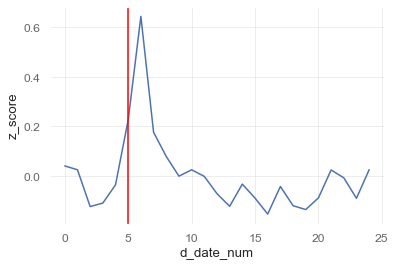

In [308]:
sns.lineplot(x=final_event_period_data.index, y=final_event_period_data)
plt.axvline(x=5, ymin=0, ymax=1, color='red')

<AxesSubplot:xlabel='2022-05-20 00:00:00', ylabel='Count'>

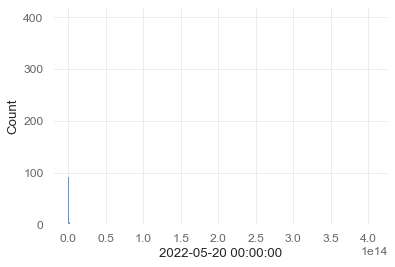

In [42]:
latest_marketcap = marketcap_df.iloc[-1]
latest_marketcap = latest_marketcap[~latest_marketcap.isnull()]

sns.histplot(latest_marketcap)

In [43]:
latest_marketcap[latest_marketcap == latest_marketcap.max()] # 삼성전자(005930)가 지나친 outlier

ISU_SRT_CD
005930    4.059452e+14
Name: 2022-05-20 00:00:00, dtype: float64

- 2022-06-11 기준 시가총액
    1. 삼성전자: 3,808,721억원
    2. LG 에너지솔루션: 994,500억원
    3. SK 하이닉스: 753,482억원

최소 시총 금액도 정해서 해야 할 듯. 

일단 가볍게 90% quantile

In [44]:
FLOOR_MARKETCAP_QUANTILE = 0.2
CEILING_MARKETCAP_QUANTILE = 0.01


In [45]:
floor_quantile_value = np.quantile(latest_marketcap, FLOOR_MARKETCAP_QUANTILE)
floor_quantile_value

62335416187.99999

In [46]:
ceiling_quantile_value = np.quantile(latest_marketcap, 1 - CEILING_MARKETCAP_QUANTILE)
ceiling_quantile_value

12697886979424.035

<AxesSubplot:xlabel='2022-05-20 00:00:00', ylabel='Count'>

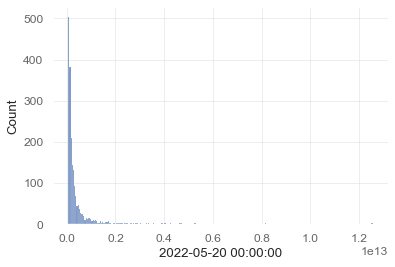

In [47]:
latest_marketcap_hist = latest_marketcap[(floor_quantile_value <= latest_marketcap) & (latest_marketcap <= ceiling_quantile_value)]
sns.histplot(latest_marketcap_hist)

Let's try `log()` transformation

<AxesSubplot:xlabel='2022-05-20 00:00:00', ylabel='Count'>

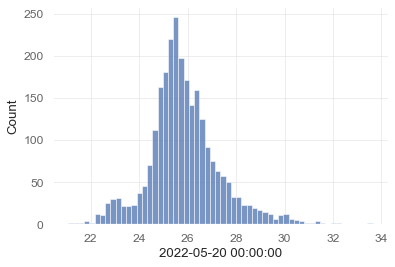

In [48]:
latest_marketcap_log = np.log(latest_marketcap)
sns.histplot(latest_marketcap_log)

In [49]:
marketcap_top20p = marketcap_df.iloc[-1].copy()
marketcap_top20p = marketcap_top20p.astype(float)
marketcap_top20p = pd.DataFrame({'marketcap': marketcap_top20p, 'sid': marketcap_top20p.index})
marketcap_top20p.sort_values(inplace=True, by='marketcap', ascending=False)
marketcap_top20p.reset_index(inplace=True, drop=True)

p20 = int(len(marketcap_top20p) * 0.2)

marketcap_top20p = marketcap_top20p.iloc[:p20]
marketcap_top20p

,marketcap,sid
0,4.059452e+14,005930
1,1.015560e+14,373220
2,8.190027e+13,000660
3,5.750859e+13,207940
4,4.994922e+13,005935
...,...,...
600,3.711285e+11,030530
601,3.700000e+11,037070
602,3.697404e+11,051370
603,3.697395e+11,104700


In [50]:
marketcap_top20p_list = list(marketcap_top20p['sid'])

with open('sid_list_top20p.pickle', 'wb') as p:
    pickle.dump(marketcap_top20p_list, p)

In [51]:
sid2codename = lv1_df[['ISU_SRT_CD', 'ISU_ABBRV', 'MKT_NM']].copy().drop_duplicates()

In [52]:
sid2codename['MKT_NM'] = sid2codename['MKT_NM'].str.lower()

In [53]:
kospi_sid2codename = sid2codename[sid2codename['MKT_NM'] == 'kospi']
kosdaq_sid2codename = sid2codename[sid2codename['MKT_NM'] == 'kosdaq']

In [54]:
kospi_sid2codename = {sid: codename for sid, codename in zip(kospi_sid2codename['ISU_SRT_CD'], kospi_sid2codename['ISU_ABBRV'])}
kosdaq_sid2codename = {sid: codename for sid, codename in zip(kosdaq_sid2codename['ISU_SRT_CD'], kosdaq_sid2codename['ISU_ABBRV'])}

In [55]:
with open('kospi_ii2codename_combined.pickle', 'wb') as p:
    pickle.dump(kospi_sid2codename, p)

with open('kosdaq_ii2codename_combined.pickle', 'wb') as p:
    pickle.dump(kosdaq_sid2codename, p)

아래는 잠시 우리은행꺼. 

In [42]:
# kospi_ii_l = kospi_univ_df.columns
# kospi_ii2dates = {}

# for ii in kospi_ii_l:
#     dates = kospi_univ_df[ii].index[kospi_univ_df[ii].fillna(False)]
#     if len(dates) > 0:
#         kospi_ii2dates[ii] = dates

In [43]:
# kosdaq_ii_l = kosdaq_univ_df.columns
# kosdaq_ii2dates = {}

# for ii in kosdaq_ii_l:
#     dates = kosdaq_univ_df[ii].index[kosdaq_univ_df[ii].fillna(False)]
#     if len(dates) > 0:
#         kosdaq_ii2dates[ii] = dates

In [44]:
# pickle.dump(kospi_ii2dates, open('kospi_ii2dates.pickle','wb'))
# pickle.dump(kosdaq_ii2dates, open('kosdaq_ii2dates.pickle', 'wb'))

Finding: 

- 우리은행(000030) -> 우리금융지주(316140) 으로 바뀌었던 적이 있다. 즉, KRX의 sid는 가변적이다. 
- 게다가 KRX에서는 이렇게 지나간 sid에 대해 검색되지 않도록 해놨다. 

## 3. Make price-volume chart graph

- Simple price-volume chart using both `seaborn`/`streamlit`
- Show biggest winners/losers on mouse hover
    - Make pseudo-KOSPI portfolio mimicking KOSPI index
    - Show Top 3 winners/losers on the graph 

## 4. Make Finviz-style stock tree map

## 5. Make return correlation clustering DM 

- Also, visualize the result

## 6. Create NLP news DM